# Lab 2

Author: Justin Ventura [[jventura3@gulls.salisbury.edu]]

Date: Thursday, September 12th, 2020.

## - Description -

Vector & Geometry classes used to graphically represent polygons with matplotlib.  Then a few methods for all of these including vector operations, cyclic test, and a test to see if a given point is in a polygon.  This is where every test and representation will be done.

### Vector Class

In [188]:
from math import sqrt

class Vector:
    """
    This class creates an R2 vector, that is, a
    vector with an x and y component.
    Default (x,y) -> (1,1)
    """
    def __init__(self, x: float = 0, y: float = 1):
        self._x = x
        self._y = y

    # Magic Methods:
    def __repr__(self):
        return 'Vector({}, {})'.format(self._x, self._y)

    def __getitem__(self, position: int):
        return self._x if position is 0 else self._y

    # Operator Overloads.
    def __add__(self, other):
        return Vector(self._x + other._x, self._y + other._y)

    def __sub__(self, other):
        return Vector(self._x - other._x, self._y - other._y)

    def __eq__(self, other) -> bool:
        return (self.coords() == other.coords())

    # Class Attribute Getters.
    def get_x(self) -> float:
        """ Returns x value as float. """
        return self._x

    def get_y(self) -> float:
        """ Returns y value as float. """
        return self._y

    def coords(self) -> tuple:
        """ Returns tuple with x and y values. """
        return (self._x, self._y)

    # Vector Operations.
    def dot_prod(self, _v) -> float:
        """ Computes the dot product of self & other vector. """
        return sum(u_i * v_i for u_i, v_i in zip(self.coords(), _v.coords()))

    def sum_of_squares(self, _v) -> float:
        """ This function computes v_1 * v_1 + ... v_n * v_n """
        return(_v.dot_prod(_v))

    def magnitude(self, _v) -> float:
        """ This function computes length/magnitude of v """
        return sqrt(self.sum_of_squares(_v))

    def distance(self, _v) -> float:
        """ This function computes the distance between vectors u and v """
        return self.magnitude(self - _v)

### Vector Class Operation Tests:
- Addition/Subtraction
- Dot Product
- Vector Distance

In [189]:
# Vectors:
v1, v2, v3, v4 = Vector(1,1), Vector(4, 2), Vector(9, 4), Vector(69, 4.20)
print(f'v1: {v1} | v2: {v2} | v3: {v3} | v4: {v4}\n')

# Addition & Subtraction Tests:
print('------ ADD / SUB ------')
print('v1 + v2 = ', v1 + v2)
print('v3 - v1 = ', v3 - v1)

# Dot Product Tests:
print('\n------ DOT  PROD ------')
print('v2 . v3 = ', v2.dot_prod(v3)) # Should result in 44
print('v1 . v4 = ', v1.dot_prod(v4)) # Should result in 73.2

# Vector Distance Tests:
print('\n------ VECT DIST ------')
print('|v1 v3| = ', v1.distance(v3)) # Should result in ~08.544
print('|v3 v4| = ', v3.distance(v4)) # Should result in ~60.003


v1: Vector(1, 1) | v2: Vector(4, 2) | v3: Vector(9, 4) | v4: Vector(69, 4.2)

------ ADD / SUB ------
v1 + v2 =  Vector(5, 3)
v3 - v1 =  Vector(8, 3)

------ DOT  PROD ------
v2 . v3 =  44
v1 . v4 =  73.2

------ VECT DIST ------
|v1 v3| =  8.54400374531753
|v3 v4| =  60.000333332407415


### Geometry Class

In [190]:
# For book keeping purposes.
import sys
from typing import List, Tuple

# Pascal naming because my pylinter would not shut up.
VectList = List[Vector]
EdgeList = List[Tuple[Vector, Vector]]

class Geometry:
    """
    geometry class to make a polygon of vectors.
    """
    # Magic Methods:
    def __init__(self, vertices: VectList = None, edges: EdgeList = None):
        """
        Only pass in 'vertices' and 'edges' if they create a proper
        polygon (open or closed).
        """
        self._vertices = vertices
        self._edges = edges
        self._last = vertices[-1]

    def __str__(self):
        return f'Vertices: {self._vertices}.\nEdges: {self._edges}'
    
    # Utility Methods:

    def add_vertex(self, v: Vector) -> None:
        """
        This function takes a vector, and adds it to the class' list
        of vertices.
        """
        if self._vertices is None:
            self.vertices = [v]
            self._last = v
        else:
            self._vertices.append(v)

    def add_face(self, To: Vector = None) -> None:
        """
        This function takes two vectors, then creates an edge between
        the two.  No duplicate edges allowed.
        """

        # Req 1: vector 2 exists.
        assert(To is not None), 'Adding a face requires a vector.'
        # Req 2: neither vectors connect already.
        assert((self._last, To) not in self._edges), 'Duplicate edges not allowed!'
        # Req 3: No self connecting edges.
        assert(To is not self._last), 'Cannot connect edge to self.'

        self._edges.append((self._last, To))
        self._last = To
        return None

    def is_closed(self) -> bool:
        """
        Determines if the given geometry is closed or not.  That is,
        if there is a path that goes from start, and returns back
        at some point.
        """
        return len(self._vertices) is len(self._edges)

    def _intersects(self, query: Vector, edge: Tuple[Vector, Vector]):
        """
        This function looks for intersections between the given
        query point, and a given edge from vectors u to v.

        NOTE: I did not come up with the 'Ray-Casting Algorithm,'
        this was explained in the lab instructions.
        """

        # Extract the two vectors passed in, these are the bounds.
        u, v = edge
        intersect = False

        # Makes it easier to go from low to high (since the ray travels left to
        # right) in my opinion.
        if u.get_y() > v.get_y():
            u, v = v, u

        # NOTE: this takes care of the occasion that the ray passes through a
        # completely horizontal edge.  So if we increase the y by a small number,
        # the ray won't consider the passing as an intersection.
        if query.get_y() == u.get_y() or query.get_y() == v.get_y():
            query = Vector(query.get_x(), query.get_y() + 0.000001)

        # Cases:
        # 1) If query x is greater than both u & v's x coords, then obviously there
        # is no intersection.
        # 2) Since the ray is horizontal, if the query point's y is less than the
        # lower vector's y (u), then there is no way the ray could intersect.
        # 3) Use the same logic in 2) for this.
        if (query.get_x() > max(u.get_x(), v.get_x()) or query.get_y() < u.get_y() or query.get_y() > v.get_y()):
            return intersect # False
    
        # If the query's x value is less than u or v's, whichever is smaller 
        # then it will inevitably run into one of them at this point.  The
        # previous if-statement establishes that the query's y value is in
        # between that of u & v.
        if query.get_x() < min(u.get_x(), v.get_x()):
            return not intersect # True
        else:
            if abs(u.get_x() - v.get_x()) > sys.float_info.min:
                BAX = (v.get_y() - u.get_y()) / (1.0*(v.get_x() - u.get_x()))
            else:
                BAX = sys.float_info.max
            if abs(u.get_x() - query.get_x()) > sys.float_info.min:
                PAX = (query.get_y() - u.get_y()) / (1.0*(query.get_x() - u.get_x()))
            else:
                PAX = sys.float_info.max

            return PAX >= BAX
 
    def is_inside(self, query: Vector) -> bool:
        """
        Returns whether or not the given point (vector) is
        in the geometry.

        Algorithm: 
        1) shoot a ray from the query point.
        2) test the ray against every edge in the geometry:
            a) if the ray intersects, count++.
            b) if the ray never intersections, count unchanged.
        3) sum the intersections:
            1) if the sum is odd; point is in the geometry.
            2) if the sum is even; point lies outside geometry.
        """
        # NOTE: 'open' geometry's will raise an error, as this
        # algorithm will be inconclusive on such a shape.
        assert(self.is_closed is not True), 'Algorithm only works on closed geometrys!'

        # Call the helper method to perform calculations.
        intersections = sum(self._intersects(query, edge) for edge in self._edges)
        return intersections % 2 == 1

# Setting up tests...

### Shape Plotting Method:

In [191]:
import matplotlib.pyplot as plt

def draw_polygon(poly: Geometry = None, q_point: List = None) -> None:
    """
    Draws the given polygon.  NOTE: q_point should be a list of two
    coordinates: [x, y].
    """
    x = [ [pair[0].get_x()] + [pair[1].get_x()] for pair in poly._edges ]
    y = [ [pair[0].get_y()] + [pair[1].get_y()] for pair in poly._edges ]

    plt.plot(x, y)
    plt.plot(q_point[0], q_point[1], marker='o', markersize=3, color="red")
    plt.title('Given Polygon:')
    plt.xlabel('X - Coords')
    plt.ylabel('Y - Coords')
    plt.axis('equal')
    plt.show()

### Creating shapes to plot...

|   Shape   	|  Query Point  	|  is_inside()  	|  Poly State  	|
|:---------:	|:-------------:	|:-------------:	|--------------	|
| Rectangle 	|    (3, 5.5)   	|      True     	|       Closed 	|
| Square    	|    (1, 11)    	|     False     	|       Closed 	|
| Triangle  	|     (7, 7)    	|      True     	|       Closed 	|
| Octagon   	|      None     	|     False     	|         Open 	|
| Strange   	|   (5.5, 4.5)  	|      True     	|       Closed 	|


In [192]:
# QUERY POINTS:
query_points = [ [3, 2.5], [1, 11], [7, 7], [5.5, 4.5] ]

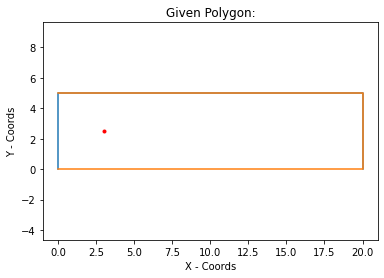

True


In [193]:
# Rectangle
vertices = [(0, 0), (0, 5), (20, 5), (20, 0)]
edges = [ ( (0, 0), (0, 5) ), ( (0, 5), (20, 5) ), ( (20, 5), (20, 0) ), ( (20, 0), (0, 0) ) ]

rect_v = [Vector(pair[0], pair[1]) for pair in vertices]
rect_e = [ ( Vector(pair[0][0], pair[0][1]), Vector(pair[1][0], pair[1][1]) ) for pair in edges]
rect = Geometry(rect_v, rect_e)

draw_polygon(rect, query_points[0])
print(rect.is_inside(Vector(query_points[0][0], query_points[0][1])))